# Depression Detection Project

# Import Libraries

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load and Analyse Data

In [213]:
df = pd.read_csv('Mental Health Dataset.csv')


In [214]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [215]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,734,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,2014-08-27 12:31:41,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,780,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [216]:
df.shape

(292364, 17)

In [217]:
df.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

# Plot target stress Histogram

In [218]:
# histogram plot of Target column classification
def histogram_plot(label_name = 'Growing_Stress'):
    num_buckets = 50
    plt.hist(df[label_name], bins=num_buckets, edgecolor='black')
    plt.xlabel(f'Samples')
    plt.ylabel(f'Number of {label_name}')
    plt.title(f'Histogram of {label_name}')
    plt.show()


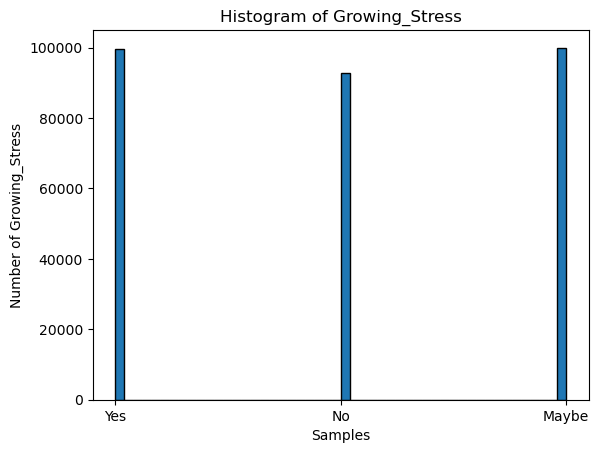

In [219]:
histogram_plot('Growing_Stress')

# Cleaning Dataset

In [220]:
# fill nan values 
df = df.fillna('None')

Tmestamp column Preprocess

In [221]:
# get month from Timestamp
df = df[df['Growing_Stress'] != 'Maybe']
df['Month'] = pd.to_datetime(df['Timestamp'], dayfirst=True).dt.month
df = df.drop(columns=['Timestamp'])

C:\Users\ANISH\AppData\Local\Temp\ipykernel_1604\1389023440.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Month'] = pd.to_datetime(df['Timestamp'], dayfirst=True).dt.month


Drop duplicates

In [222]:
df = df.drop_duplicates()
df.shape

(73925, 17)

# Visualize and Understand Dataset

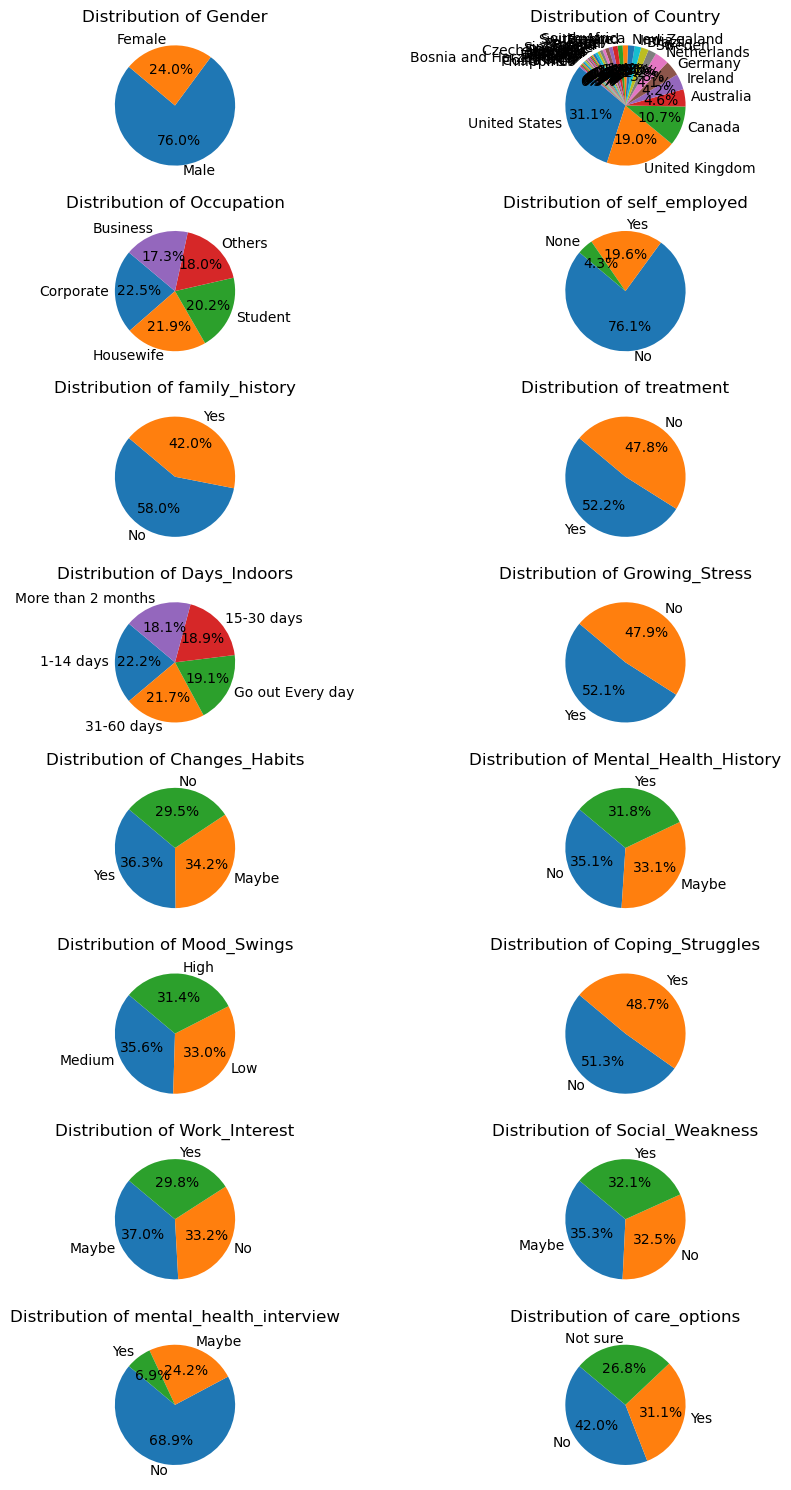

In [223]:
# numerical and categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
numerical_columns = [ col for col in df.columns.to_list() if col not in categorical_columns]

# the categorical columns pie chart plot:

cat_cols = categorical_columns
plot_cats = []
for i in cat_cols:
    if len(np.unique(df[i])) < 50:
        plot_cats.append(i)

cat_cols = plot_cats
fig, axes = plt.subplots(int(len(cat_cols)/2), 2, figsize=(10, 15))

for i, col in enumerate(cat_cols):
    row = i // 2
    col_idx = i % 2

    counts = df[col].value_counts()

    axes[row, col_idx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[row, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Preprocess Data

In [224]:
df = df.drop(columns=['Country'])

Preprocessing Days_Indoors

In [225]:
np.unique(df['Days_Indoors'])

array(['1-14 days', '15-30 days', '31-60 days', 'Go out Every day',
       'More than 2 months'], dtype=object)

In [226]:
# Preprocess the  columns data
def Days_Indoors_encode(value):
    if value == '1-14 days':
        return np.random.randint(1, 15)  # Random number between 1 and 14
    elif value == '15-30 days':
        return np.random.randint(15, 31) # Random number between 15 and 30
    elif value == '31-60 days':
        return np.random.randint(31, 61) # Random number between 31 and 60
    elif value == 'Go out Every day':
        return 0  # Assuming 0 means going out every day
    elif value == 'More than 2 months':
        return np.random.randint(61, 181) # Random number greater than 60 (e.g., up to 6 months)
    else:
        print(value, "nnnno")

In [227]:
temp = df['Days_Indoors'].to_list()
for i in range(df.shape[0]):
    temp[i] = Days_Indoors_encode(temp[i])
df['Days_Indoors'] = temp
df.head()

,Gender,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Month
0,Female,Corporate,None,No,Yes,1,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,8
1,Female,Corporate,None,Yes,Yes,6,Yes,No,Yes,Medium,No,No,Yes,No,No,8
2,Female,Corporate,None,Yes,Yes,12,Yes,No,Yes,Medium,No,No,Yes,No,Yes,8
3,Female,Corporate,No,Yes,Yes,5,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,8
4,Female,Corporate,No,Yes,Yes,6,Yes,No,Yes,Medium,No,No,Yes,No,Yes,8


Preprocessing Occupation Column

In [228]:
df= pd.get_dummies(df, columns=['Occupation'], drop_first=True)

In [229]:
# Identify one-hot encoded columns (those that start with 'Occupation_')
onehot_columns = [col for col in df.columns if col.startswith('Occupation_')]

# Convert only those columns from True/False to 0/1
df[onehot_columns] = df[onehot_columns].astype(int)
df.head(4)

,Gender,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Month,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student
0,Female,None,No,Yes,1,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,8,1,0,0,0
1,Female,None,Yes,Yes,6,Yes,No,Yes,Medium,No,No,Yes,No,No,8,1,0,0,0
2,Female,None,Yes,Yes,12,Yes,No,Yes,Medium,No,No,Yes,No,Yes,8,1,0,0,0
3,Female,No,Yes,Yes,5,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,8,1,0,0,0


Apply Label Encoding for selected columns

In [230]:
column_name = ['Gender', 'self_employed', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
mapping = {'No':0, 'Maybe': 1, 'Yes':2, 'Not sure':1, 'Low':0, 'Medium':1, 'High':2,'None':1,'Female':0, 'Male':1}
df[column_name] = df[column_name].applymap(lambda x: mapping.get(x, x))


C:\Users\ANISH\AppData\Local\Temp\ipykernel_1604\2240760479.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[column_name] = df[column_name].applymap(lambda x: mapping.get(x, x))


In [231]:
column_name = ['family_history', 'treatment',
       'Growing_Stress','Coping_Struggles']
mapping = {'No':0, 'Yes':1}
df[column_name] = df[column_name].applymap(lambda x: mapping.get(x, x))
df[column_name].head()
df.head(4)

C:\Users\ANISH\AppData\Local\Temp\ipykernel_1604\282257630.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[column_name] = df[column_name].applymap(lambda x: mapping.get(x, x))


,Gender,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Month,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student
0,0,1,0,1,1,1,0,2,1,0,0,2,0,1,8,1,0,0,0
1,0,1,1,1,6,1,0,2,1,0,0,2,0,0,8,1,0,0,0
2,0,1,1,1,12,1,0,2,1,0,0,2,0,2,8,1,0,0,0
3,0,0,1,1,5,1,0,2,1,0,0,2,1,2,8,1,0,0,0


# Feature Selection

In [232]:

X = df[['Gender', 'self_employed', 'family_history', 'treatment','Days_Indoors', 'Changes_Habits','Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview','care_options', 'Month', 'Occupation_Corporate', 'Occupation_Housewife','Occupation_Others', 'Occupation_Student']]  # Features
y = df['Growing_Stress']  # Target

# Create Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=14, random_state=42)
clf.fit(X, y)
print(X.shape, y.shape)

# Get Feature Importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_}).sort_values(by='Importance', ascending=False)  # Sort by importance
print("\nTop Features:\n", feature_importance)

(73925, 18) (73925,)

Top Features:
                     Feature  Importance
10          Social_Weakness    0.157550
5            Changes_Habits    0.126312
6     Mental_Health_History    0.118581
7               Mood_Swings    0.114558
4              Days_Indoors    0.113507
0                    Gender    0.091502
8          Coping_Struggles    0.069523
9             Work_Interest    0.049980
17       Occupation_Student    0.044722
14     Occupation_Corporate    0.044566
15     Occupation_Housewife    0.040585
16        Occupation_Others    0.027364
12             care_options    0.000339
3                 treatment    0.000320
1             self_employed    0.000175
2            family_history    0.000157
13                    Month    0.000138
11  mental_health_interview    0.000119


# Training and Testing model

In [233]:
# Define features and target
X = df[['Social_Weakness','Changes_Habits','Days_Indoors','Mental_Health_History','Gender','Mood_Swings',
         'Occupation_Student','Occupation_Corporate','Occupation_Housewife','Occupation_Others','Work_Interest']]  # Features
y = df['Growing_Stress']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [234]:
# Create Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=15, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7115
           1       0.99      0.99      0.99      7670

    accuracy                           0.99     14785
   macro avg       0.99      0.99      0.99     14785
weighted avg       0.99      0.99      0.99     14785



# Save model

In [237]:
# save model
import pickle 

pickle.dump(clf, open('Depression_detection_model.sav', 'wb'))